In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn_pandas import DataFrameMapper

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
train = pd.read_csv("Datasets/train.csv")

In [3]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


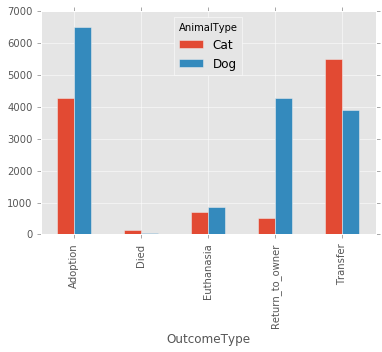

In [4]:
tabla = pd.crosstab(index=train["OutcomeType"], columns=train["AnimalType"])
tabla.plot(kind="bar")

In [5]:
# convert (string) years, months, days from AgeuponOutcome to (int) years
def to_years(x):
    # get the number and the units
    x = str(x)
    if(x=="nan"): return 0

    n = int(x.split()[0])

    if x.find("month")  > -1: return n/12
    elif x.find("week") > -1: return n/52
    elif x.find("day")  > -1: return n/365
    return n

In [6]:
train["AgeuponOutcome"] = train["AgeuponOutcome"].apply(to_years)

In [7]:
# functions to get sex and neutered as numeric
def get_sex(x):
    x = str(x)
    if x.find('Male')   > -1: return 1
    if x.find('Female') > -1: return 0
    return 2

def get_neutered(x):
    x = str(x)
    if x.find('Spayed')   >= -1: return 1
    if x.find('Neutered') >= -1: return 1
    if x.find('Intact')   >= -1: return 0
    return 2

In [8]:
train['Sex'] = train.SexuponOutcome.apply(get_sex)
train['Neutered'] = train.SexuponOutcome.apply(get_neutered)

In [9]:
# change str from AnimalType to int 1,0
def AT_to_int(x):
    x = str(x)
    if x.find('Cat') > -1: return 2
    if x.find('Dog') > -1: return 1
    return 0

In [10]:
train['AnimalType'] = train.AnimalType.apply(AT_to_int)

In [11]:
# change str from OutcomeType to int
def OT_to_int(x):
    x = str(x)
    if x.find('Adoption')   > -1: return 1
    if x.find('Return')     > -1: return 2
    if x.find('Transfer')   > -1: return 3
    if x.find('Died')       > -1: return 4
    if x.find('Euthanasia') > -1: return 5
    return 0

In [12]:
train['OutcomeType'] = train.OutcomeType.apply(OT_to_int)

In [15]:
# extract hour from DataTime as int
def ext_hour(x):
    x = str(x)
    time = x.split()[1]
    hour = int(time.split(':')[0])
    return hour

In [16]:
train['Hour'] = train.DateTime.apply(ext_hour)

In [30]:
# define breed as pure->(1) or mix->(0)
def B_to_int(x):
    x = str(x)
    x = x.lower()
    if x.find('mix') > -1: return 0
    return 1

In [32]:
train['BreedI'] = train.Breed.apply(B_to_int)

In [33]:
train.describe()

,OutcomeType,AnimalType,AgeuponOutcome,Sex,Neutered,Hour,BreedI
count,26729.000000,26729.000000,26729.000000,26729.000000,26729.0,26729.000000,26729.000000
mean,2.138875,1.416551,2.175778,0.579595,1.0,14.445396,0.165775
std,1.135442,0.492996,2.965306,0.570557,0.0,3.337331,0.371885
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1.000000,1.000000,0.166667,0.000000,1.0,12.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.0,15.000000,0.000000
75%,3.000000,2.000000,3.000000,1.000000,1.0,17.000000,0.000000
max,5.000000,2.000000,20.000000,2.000000,1.0,23.000000,1.000000


In [15]:
train_t = train[:16038]
train_v = train[16038:26730]

In [16]:
mapper = DataFrameMapper([('AnimalType', None),
                          ('AgeuponOutcome', None),
                          ('Sex', None),
                          ('Neutered', None),
                          ('Hour', None)])
X = np.round(mapper.fit_transform(train_t.copy()))
y = train_t.OutcomeType.values

In [115]:
len(y)

16038

In [116]:
X

array([[  1.,   1.,   1.,   1.],
       [  2.,   1.,   0.,   1.],
       [  1.,   2.,   1.,   1.],
       ..., 
       [  1.,   2.,   0.,   1.],
       [  1.,   0.,   1.,   1.],
       [  1.,  15.,   1.,   1.]])

In [17]:
C = 1
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [95]:
mapper = DataFrameMapper([('AnimalType', None),
                          ('AgeuponOutcome', None),
                          ('Sex', None),
                          ('Neutered', None),
                          ('Hour', None)])

X_predict = np.round(mapper.fit_transform(train_v.copy()))

output = lin_svc.predict(X_predict)
cm = confusion_matrix(train_v.OutcomeType.values, output)
cm

array([[3445,  295,  551,    0,    0],
       [ 990,  543,  386,    0,    0],
       [1250,  208, 2305,    0,    0],
       [  19,    4,   56,    0,    0],
       [ 126,  145,  368,    0,    0]])

In [106]:
res = pd.DataFrame(cm, columns=["Adoption","Return","Transfer","Died","Euthanasia"])

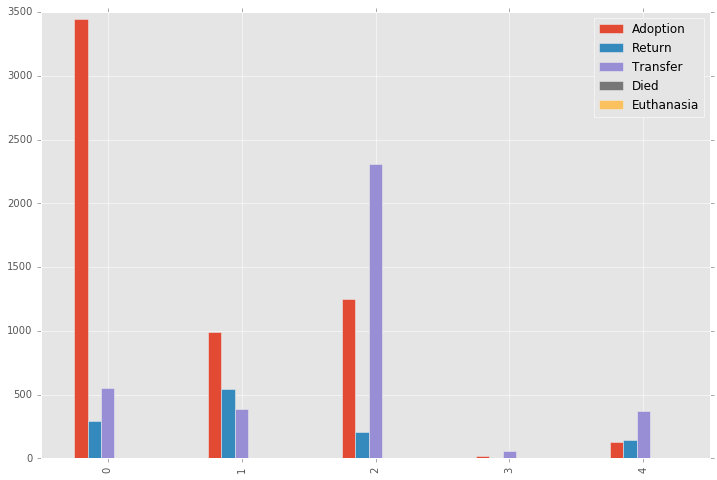

In [97]:
res.plot(kind="bar", figsize=(12,8))

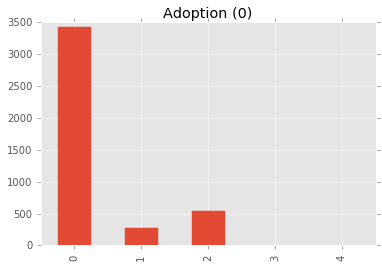

In [101]:
res2 = pd.DataFrame(cm.transpose(), columns=["Adoption","Return","Transfer","Died","Euthanasia"])
res2.Adoption.plot(kind="bar", title="Adoption (0)")

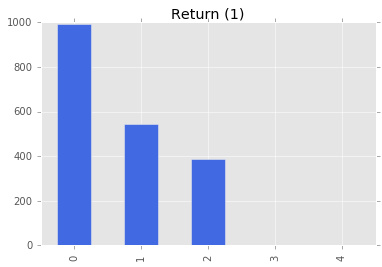

In [102]:
res2.Return.plot(kind="bar", title="Return (1)", color="royalblue")

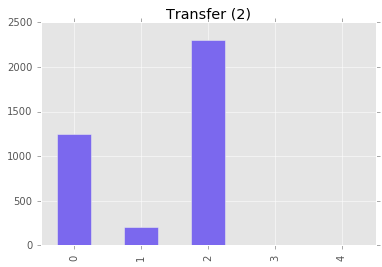

In [103]:
res2.Transfer.plot(kind="bar", title="Transfer (2)", color="mediumslateblue")

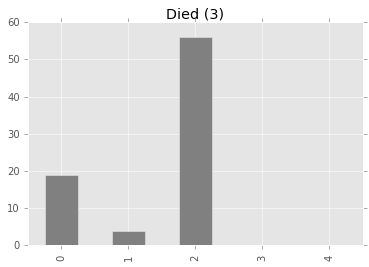

In [104]:
res2.Died.plot(kind="bar", title="Died (3)", color="grey")

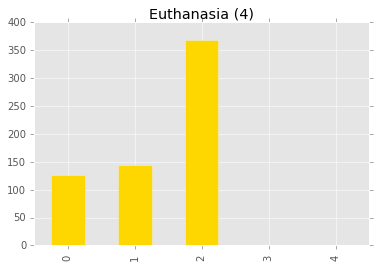

In [105]:
res2.Euthanasia.plot(kind="bar", title="Euthanasia (4)", color="gold")

In [82]:
cm.transpose()

array([[3445,  990, 1250,   19,  126],
       [ 295,  543,  208,    4,  145],
       [ 551,  386, 2305,   56,  368],
       [   0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0]])

In [113]:
test = pd.read_csv("Datasets/test.csv")
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
